# **SSD: Single Shot MultiBox Object Detector, in PyTorch**
Part 1.   Loading SSD program data and basic configuration 載入SSD程式資料及基本配置

Part 2.   SSD training (VOC2007、VOC2012)

Part 3.   SSD prediction (DEMO)


# **Part 1.Loading SSD program data and basic configuration**

***Gogole drive mounting***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1)Unzip the code

2)Don't forget to create the folder in your Google drive：20240429_ssd_colab_run_test


In [2]:
!unzip /content/drive/MyDrive/20240429_ssd_colab_run_test/ssd.pytorch-master.zip -d /content

Archive:  /content/drive/MyDrive/20240429_ssd_colab_run_test/ssd.pytorch-master.zip
   creating: /content/ssd.pytorch-master/
  inflating: /content/ssd.pytorch-master/.gitattributes  
  inflating: /content/ssd.pytorch-master/.gitignore  
   creating: /content/ssd.pytorch-master/data/
  inflating: /content/ssd.pytorch-master/data/coco.py  
  inflating: /content/ssd.pytorch-master/data/coco_labels.txt  
  inflating: /content/ssd.pytorch-master/data/config.py  
  inflating: /content/ssd.pytorch-master/data/example.jpg  
   creating: /content/ssd.pytorch-master/data/scripts/
  inflating: /content/ssd.pytorch-master/data/scripts/COCO2014.sh  
  inflating: /content/ssd.pytorch-master/data/scripts/VOC2007.sh  
  inflating: /content/ssd.pytorch-master/data/scripts/VOC2012.sh  
  inflating: /content/ssd.pytorch-master/data/voc0712.py  
  inflating: /content/ssd.pytorch-master/data/__init__.py  
   creating: /content/ssd.pytorch-master/demo/
  inflating: /content/ssd.pytorch-master/demo/demo.ipy

Set the colab default folder

In [3]:
import os
default_folder = '/content/ssd.pytorch-master/'
os.chdir(default_folder)

*download dataset*-VOC2007、VOC2012

In [ ]:
# download data: VOC2007
# !sh data/scripts/VOC2007.sh /content/ssd.pytorch-master/

串流輸出內容已截斷至最後 5000 行。
VOCdevkit/VOC2007/JPEGImages/000732.jpg
VOCdevkit/VOC2007/JPEGImages/000734.jpg
VOCdevkit/VOC2007/JPEGImages/000735.jpg
VOCdevkit/VOC2007/JPEGImages/000736.jpg
VOCdevkit/VOC2007/JPEGImages/000737.jpg
VOCdevkit/VOC2007/JPEGImages/000741.jpg
VOCdevkit/VOC2007/JPEGImages/000743.jpg
VOCdevkit/VOC2007/JPEGImages/000744.jpg
VOCdevkit/VOC2007/JPEGImages/000745.jpg
VOCdevkit/VOC2007/JPEGImages/000747.jpg
VOCdevkit/VOC2007/JPEGImages/000749.jpg
VOCdevkit/VOC2007/JPEGImages/000751.jpg
VOCdevkit/VOC2007/JPEGImages/000757.jpg
VOCdevkit/VOC2007/JPEGImages/000758.jpg
VOCdevkit/VOC2007/JPEGImages/000759.jpg
VOCdevkit/VOC2007/JPEGImages/000762.jpg
VOCdevkit/VOC2007/JPEGImages/000765.jpg
VOCdevkit/VOC2007/JPEGImages/000766.jpg
VOCdevkit/VOC2007/JPEGImages/000769.jpg
VOCdevkit/VOC2007/JPEGImages/000773.jpg
VOCdevkit/VOC2007/JPEGImages/000775.jpg
VOCdevkit/VOC2007/JPEGImages/000778.jpg
VOCdevkit/VOC2007/JPEGImages/000779.jpg
VOCdevkit/VOC2007/JPEGImages/000781.jpg
VOCdevkit/VOC2007/J

In [ ]:
# download data: VOC2012
# !sh data/scripts/VOC2012.sh /content/ssd.pytorch-master/

串流輸出內容已截斷至最後 5000 行。
VOCdevkit/VOC2012/SegmentationClass/2008_001882.png
VOCdevkit/VOC2012/SegmentationClass/2008_001885.png
VOCdevkit/VOC2012/SegmentationClass/2008_001895.png
VOCdevkit/VOC2012/SegmentationClass/2008_001896.png
VOCdevkit/VOC2012/SegmentationClass/2008_001926.png
VOCdevkit/VOC2012/SegmentationClass/2008_001966.png
VOCdevkit/VOC2012/SegmentationClass/2008_001971.png
VOCdevkit/VOC2012/SegmentationClass/2008_001992.png
VOCdevkit/VOC2012/SegmentationClass/2008_001997.png
VOCdevkit/VOC2012/SegmentationClass/2008_002032.png
VOCdevkit/VOC2012/SegmentationClass/2008_002043.png
VOCdevkit/VOC2012/SegmentationClass/2008_002064.png
VOCdevkit/VOC2012/SegmentationClass/2008_002066.png
VOCdevkit/VOC2012/SegmentationClass/2008_002067.png
VOCdevkit/VOC2012/SegmentationClass/2008_002073.png
VOCdevkit/VOC2012/SegmentationClass/2008_002079.png
VOCdevkit/VOC2012/SegmentationClass/2008_002080.png
VOCdevkit/VOC2012/SegmentationClass/2008_002123.png
VOCdevkit/VOC2012/SegmentationClass/2008_00

If the files have been downloaded to the cloud, they can be directly uncompressed to the specified location.

如果雲端已下載，可以直接解壓縮至指定地點

In [4]:
# unzip the data
!unzip /content/drive/MyDrive/20240429_ssd_colab_run_test/VOCdevkit.zip -d /

串流輸出內容已截斷至最後 5000 行。
  inflating: /content/ssd.pytorch-master/VOCdevkit/VOC2012/Annotations/2009_003640.xml  
  inflating: /content/ssd.pytorch-master/VOCdevkit/VOC2012/Annotations/2010_000204.xml  
  inflating: /content/ssd.pytorch-master/VOCdevkit/VOC2012/Annotations/2011_001466.xml  
  inflating: /content/ssd.pytorch-master/VOCdevkit/VOC2012/Annotations/2008_004339.xml  
  inflating: /content/ssd.pytorch-master/VOCdevkit/VOC2012/Annotations/2012_002359.xml  
  inflating: /content/ssd.pytorch-master/VOCdevkit/VOC2012/Annotations/2010_006905.xml  
  inflating: /content/ssd.pytorch-master/VOCdevkit/VOC2012/Annotations/2007_002344.xml  
  inflating: /content/ssd.pytorch-master/VOCdevkit/VOC2012/Annotations/2010_000272.xml  
  inflating: /content/ssd.pytorch-master/VOCdevkit/VOC2012/Annotations/2008_005790.xml  
  inflating: /content/ssd.pytorch-master/VOCdevkit/VOC2012/Annotations/2008_002418.xml  
  inflating: /content/ssd.pytorch-master/VOCdevkit/VOC2012/Annotations/2008_008365.xml  


In [8]:
# download weights: fc-reduced VGG-16

!mkdir weights
!wget https://s3.amazonaws.com/amdegroot-models/vgg16_reducedfc.pth
!mv ./vgg16_reducedfc.pth ./weights/vgg16_reducedfc.pth

--2024-05-02 06:14:08--  https://s3.amazonaws.com/amdegroot-models/vgg16_reducedfc.pth
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.134.8, 52.216.237.21, 16.182.41.8, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.134.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81938914 (78M) [binary/octet-stream]
Saving to: ‘vgg16_reducedfc.pth’

vgg16_reducedfc.pth 100%[===================>]  78.14M  72.3MB/s    in 1.1s    

2024-05-02 06:14:10 (72.3 MB/s) - ‘vgg16_reducedfc.pth’ saved [81938914/81938914]



# **Part 2. SSD training (VOC2007、VOC2012)**

訓練參數設置(VOC2007、VOC2012)- data/config.py

In [ ]:
from data import *
print("\n".join("{}\t{}".format(k, v) for k, v in voc.items()))

num_classes	21
lr_steps	(80000, 100000, 120000)
max_iter	500
feature_maps	[38, 19, 10, 5, 3, 1]
min_dim	300
steps	[8, 16, 32, 64, 100, 300]
min_sizes	[30, 60, 111, 162, 213, 264]
max_sizes	[60, 111, 162, 213, 264, 315]
aspect_ratios	[[2], [2, 3], [2, 3], [2, 3], [2], [2]]
variance	[0.1, 0.2]
clip	True
name	VOC


訓練ssd模型(訓練模型會存成-VOC.pth)-命令行參數
*   --dataset (default='VOC')
*   --dataset_root (default=VOC_ROOT)
*   --basenet (default='vgg16_reducedfc.pth')
*   --batch_size (default=32)
*   --resume (default=None)
*   --start_iter (default=0)
*   --num_workers (default=4)
*   --cuda (default=True)
*   --lr (default=1e-3)
*   --momentum (default=0.9)
*   --weight_decay (default=5e-4)
*   --gamma (default=0.1)
*   --visdom (colab需額外安裝)
*   --save_folder (default='weights/')

In [ ]:
!python train.py --dataset=VOC --dataset_root=/content/ssd.pytorch-master/VOCdevkit --basenet=vgg16_reducedfc.pth --cuda=False --save_folder=/content/ssd.pytorch-master/weights/

/usr/local/lib/python3.10/dist-packages/torch/__init__.py:696: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:451.)
  _C._set_default_tensor_type(t)
Loading base network...
Initializing weights...
Loading the dataset...
Training SSD on: VOC0712
Using the specified args:
Namespace(dataset='VOC', dataset_root='/content/ssd.pytorch-master/VOCdevkit', basenet='vgg16_reducedfc.pth', batch_size=32, resume=None, start_iter=0, num_workers=4, cuda=False, lr=0.001, momentum=0.9, weight_decay=0.0005, gamma=0.1, visdom=False, save_folder='/content/ssd.pytorch-master/weights/')
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader 

# **Part 3. SSD prediction (DEMO)**

下載SSD300訓練模型權重範例-ssd300_map_77.43_v2.pth

In [5]:
!wget https://s3.amazonaws.com/amdegroot-models/ssd300_mAP_77.43_v2.pth
!mv ./ssd300_mAP_77.43_v2.pth ./weights/ssd300_mAP_77.43_v2.pth

zsh:1: command not found: wget
mv: rename ./ssd300_mAP_77.43_v2.pth to ./weights/ssd300_mAP_77.43_v2.pth: No such file or directory


使用範例進行單張圖片demo

載入library

In [10]:
import os
import sys
module_path = os.path.abspath(os.path.join('.'))
if module_path not in sys.path:
    sys.path.append(module_path)

import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
from torch.autograd import Variable
import numpy as np
import cv2
if torch.cuda.is_available():
    torch.set_default_tensor_type('torch.cuda.FloatTensor')

from ssd import build_ssd

模型載入權重，恢復訓練好的模型以用來測試


1.   恢復模型作用方式: test
2.   模型輸入尺寸(300*300)
2.   模型分辨類別(VOC2007、VOC2012: 21)



In [11]:
net = build_ssd('test', 300, 21)    # initialize SSD
net.load_weights('./weights/ssd300_mAP_77.43_v2.pth')

Loading weights into state dict...
Finished!


載入demo圖片

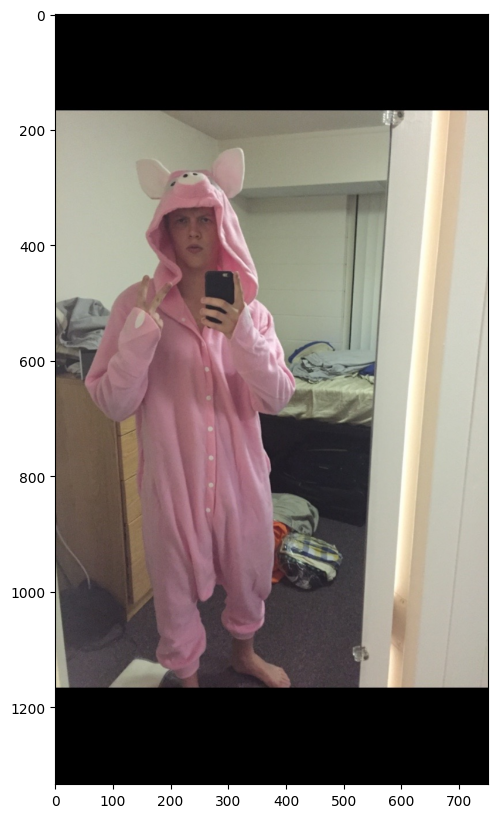

In [16]:
# image = cv2.imread('./data/example.jpg', cv2.IMREAD_COLOR)  # uncomment if dataset not downloaded
%matplotlib inline
from matplotlib import pyplot as plt
from data import VOCDetection, VOC_ROOT, VOCAnnotationTransform
# here we specify year (07 or 12) and dataset ('test', 'val', 'train')
VOC_ROOT = '/content/ssd.pytorch-master/VOCdevkit'
testset = VOCDetection(VOC_ROOT, [('2007', 'val')], None, VOCAnnotationTransform())
img_id = 60
image = testset.pull_image(img_id)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# View the sampled input image before transform
plt.figure(figsize=(10,10))
plt.imshow(rgb_image)
plt.show()

圖像處理，轉成模型輸入格式

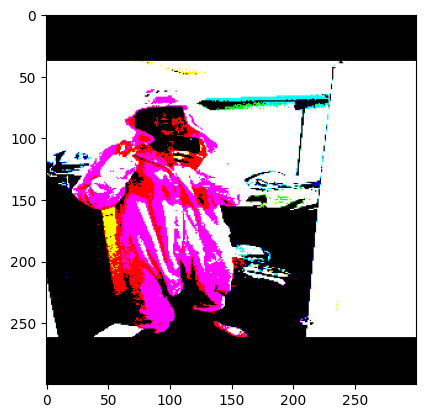

In [17]:
x = cv2.resize(image, (300, 300)).astype(np.float32)
x -= (104.0, 117.0, 123.0)
x = x.astype(np.float32)
x = x[:, :, ::-1].copy()
plt.imshow(x)
x = torch.from_numpy(x).permute(2, 0, 1)

圖像輸入ssd模型進行辨識

In [18]:
xx = Variable(x.unsqueeze(0))     # wrap tensor in Variable
if torch.cuda.is_available():
    xx = xx.cuda()
y = net(xx)

/content/ssd.pytorch-master/layers/box_utils.py:216: UserWarning: An output with one or more elements was resized since it had shape [9], which does not match the required output shape [3]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at ../aten/src/ATen/native/Resize.cpp:28.)
  torch.index_select(x1, 0, idx, out=xx1)
/content/ssd.pytorch-master/layers/box_utils.py:217: UserWarning: An output with one or more elements was resized since it had shape [9], which does not match the required output shape [3]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at ../aten/src/ATen/native/Resize.cpp:28.)
  

展示圖像辨識結果
*   取confidence scores>=0.6的結果
*   將辨識結果繪製於圖片上



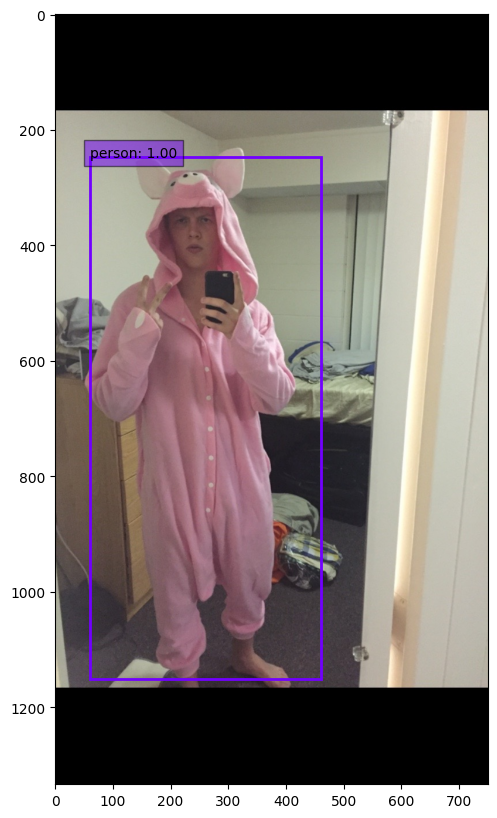

In [19]:
from data import VOC_CLASSES as labels
top_k=10

plt.figure(figsize=(10,10))
colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()
plt.imshow(rgb_image)  # plot the image for matplotlib
currentAxis = plt.gca()

detections = y.data
# scale each detection back up to the image
scale = torch.Tensor(rgb_image.shape[1::-1]).repeat(2)
for i in range(detections.size(1)):
    j = 0
    while detections[0,i,j,0] >= 0.6:
        score = detections[0,i,j,0]
        label_name = labels[i-1]
        display_txt = '%s: %.2f'%(label_name, score)
        pt = (detections[0,i,j,1:]*scale).cpu().numpy()
        coords = (pt[0], pt[1]), pt[2]-pt[0]+1, pt[3]-pt[1]+1
        color = colors[i]
        currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
        currentAxis.text(pt[0], pt[1], display_txt, bbox={'facecolor':color, 'alpha':0.5})
        j+=1